In [24]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
df = pd.read_csv("kdd_test.csv")

In [14]:
label_counts = df["labels"].value_counts()
valid_labels = label_counts[label_counts >= 2].index

df = df[df["labels"].isin(valid_labels)]

In [15]:
# Categorical columns
cat_cols = ["protocol_type", "service", "flag"]

# Encode categorical features
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Encode labels (target)
label_encoder = LabelEncoder()
df["labels"] = label_encoder.fit_transform(df["labels"])

In [16]:
X = df.drop("labels", axis=1)
y = df["labels"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42,
    class_weight="balanced",
)

In [19]:
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_pred = rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        45
           2       0.00      0.00      0.00         3
           4       1.00      0.98      0.99        82
           5       1.00      0.75      0.86         8
           7       0.99      0.98      0.98        96
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00        19
          11       0.98      1.00      0.99        62
          12       1.00      0.50      0.67         2
          14       1.00      1.00      1.00      1331
          15       0.97      0.88      0.92        41
          16       0.98      0.99      0.99      2249
          17       1.00      0.86      0.92         7
          18       0.95      1.00      0.97        74
          19       1.00      1.00      1.00        42
          20       0.00      0.00      0.00         2
    

c:\Users\03062\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\03062\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\03062\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

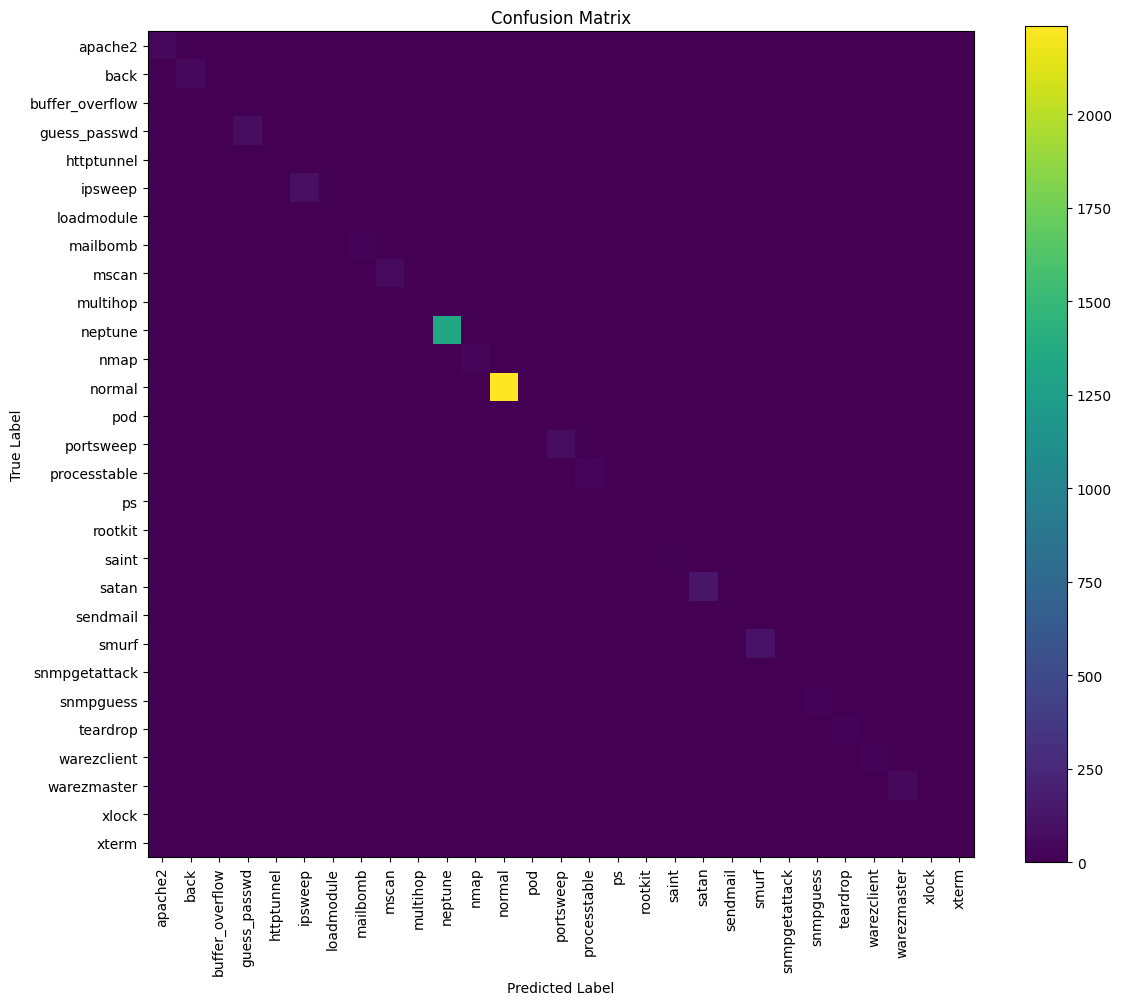

In [27]:
unique_labels = sorted(y_test.unique())
target_names = [label_encoder.inverse_transform([i])[0] for i in unique_labels]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, target_names, rotation=90)
plt.yticks(tick_marks, target_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [28]:
joblib.dump(rf, "random_forest_model.pkl")

print("Model saved as: random_forest_model.pkl")

Model saved as: random_forest_model.pkl
